# Introdução

Inserir aqui texto escrito no caderno conforme as palavras da Professora Patrícia...

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


> Amostra de 1000 clientes de um banco que solicitaram financiamento no decorrer do tempo



# Objetivo:

Analisar as variáveis (7 numéricas e 13 categóricas) de 1000 perfis ou linhas e inferir algumas interpretações conforme os resultados demonstrados em histogramas e plotagens. A finalidade principal é descobrir como variável resposta: quem é o perfil de um bom e de um mal pagador.


Importação de bibliotecas:

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Leitura do arquivo csv com o Pandas:  

In [28]:
df1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tarefa II - Análise Exploratória - Grupo_ Cesar Beck _ John Castillo_VJohn/germanProff.csv',sep=' ', 
  names = [  'Status checking account'            # Attribute 01:Status of existing checking account
            ,'Duration in month'                  # Attribute 02:
            ,'Credit history'                     # Attribute 03:
            ,'Purpose'                            # Attribute 04: 
            ,'Credit amount'                      # Attribute 05:
            ,'Savings account/bonds'              # Attribute 06:              
            ,'Present employment since'           # Attribute 07:   
            ,'Installment rate'                   # Attribute 08:Installment rate in percentage of disposable income
            ,'Personal status and sex'            # Attribute 09:
            ,'Other debtors/guarantors'           # Attribute 10:
            ,'Present residence since'            # Attribute 11:
            ,'Property'                           # Attribute 12:
            ,'Age in years'                       # Attribute 13:
            ,'Other installment plans'            # Attribute 14: 
            ,'Housing'                            # Attribute 15:
            ,'Number credits'                     # Attribute 16:Number of existing credits at this bank
            ,'Job'                                # Attribute 17:
            ,'Number of people'                   # Attribute 18:Number of people being liable to provide maintenance for  
            ,'Telephone'                          # Attribute 19:
            ,'Foreign worker'                     # Attribute 20:
            ,'Status credit'     ])                 # Attribute 21:(1 = Good,  2 = Bad))
df1.head()

,Status checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate,Personal status and sex,Other debtors/guarantors,Present residence since,Property,Age in years,Other installment plans,Housing,Number credits,Job,Number of people,Telephone,Foreign worker,Status credit
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


Identificar quais são as colunas do dataset:

In [29]:
df1.columns

Index(['Status checking account', 'Duration in month', 'Credit history',
       'Purpose', 'Credit amount', 'Savings account/bonds',
       'Present employment since', 'Installment rate',
       'Personal status and sex', 'Other debtors/guarantors',
       'Present residence since', 'Property', 'Age in years',
       'Other installment plans', 'Housing', 'Number credits', 'Job',
       'Number of people', 'Telephone', 'Foreign worker', 'Status credit'],
      dtype='object')

Colunas renomeadas para serem mais descritivas:

In [30]:
df1.rename(columns={
     'Status checking account':'A1_STATUS_CONTA',
     'Duration in month':'A2_TEMP_EMPREST',
     'Credit history':'A3_HIST_CREDITO',
     'Purpose':'A4_MOTIVO_EMPREST',
     'Credit amount':'A5_VALOR_EMPREST',
     'Savings account/bonds':'A6_INVESTIMENTOS',
     'Present employment since':'A7_TEMPO_EMPREGO',
     'Installment rate':'A8_PERC_RENDA',
     'Personal status and sex':'A9_SEXO_EST_CIVIL',
     'Other debtors/guarantors':'A10_GARANTIA',
     'Present residence since':'A11_TEMPO_RESID',
     'Property':'A12_BENS',
     'Age in years':'A13_IDADE',
     'Other installment plans':'A14_OUTROS_FIN',
     'Housing':'A15_TP_MORADIA',
     'Number credits':'A16_NR_CREDITO',
     'Job':'A17_TP_EMPREGO',
     'Number of people':'A18_NR_DEPENDENTES',
     'Telephone':'A19_TELEFONE',
     'Foreign worker':'A20_EMPREGADO_EST',
     'Status credit':'A21_ESTADO_DO_CREDITO'}, inplace=True)
df1.head()

,A1_STATUS_CONTA,A2_TEMP_EMPREST,A3_HIST_CREDITO,A4_MOTIVO_EMPREST,A5_VALOR_EMPREST,A6_INVESTIMENTOS,A7_TEMPO_EMPREGO,A8_PERC_RENDA,A9_SEXO_EST_CIVIL,A10_GARANTIA,A11_TEMPO_RESID,A12_BENS,A13_IDADE,A14_OUTROS_FIN,A15_TP_MORADIA,A16_NR_CREDITO,A17_TP_EMPREGO,A18_NR_DEPENDENTES,A19_TELEFONE,A20_EMPREGADO_EST,A21_ESTADO_DO_CREDITO
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


Demonstrar as estatísticas básicas das variáveis do dataset:


In [6]:
df1.describe()

,A2_TEMP_EMPREST,A5_VALOR_EMPREST,A8_PERC_RENDA,A11_TEMPO_RESID,A13_IDADE,A16_NR_CREDITO,A18_NR_DEPENDENTES,A21_ESTADO_DO_CREDITO
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


#Interpretação de resultados no. 01:
A duração media dos financiamentos é de quase 21 meses, com valor de DM$3271,26, com taxa de juros de 2.9%, com clientes na idade média de 35 anos e meio acabam refinanciando o financiamento original.  

In [31]:
pd.value_counts(df1['A7_TEMPO_EMPREGO'])

A73    339
A75    253
A74    174
A72    172
A71     62
Name: A7_TEMPO_EMPREGO, dtype: int64

Traduzir o 'A7_TEMPO_EMPREGO' para ser legível:


In [32]:
A71 = "Desempregado"
A72 = 1
A73 = 4 
A74 = 7
A75 = "7+"

Testar o conteúdo da variável:


In [33]:
A75

'7+'

In [34]:
df1.columns

Index(['A1_STATUS_CONTA', 'A2_TEMP_EMPREST', 'A3_HIST_CREDITO',
       'A4_MOTIVO_EMPREST', 'A5_VALOR_EMPREST', 'A6_INVESTIMENTOS',
       'A7_TEMPO_EMPREGO', 'A8_PERC_RENDA', 'A9_SEXO_EST_CIVIL',
       'A10_GARANTIA', 'A11_TEMPO_RESID', 'A12_BENS', 'A13_IDADE',
       'A14_OUTROS_FIN', 'A15_TP_MORADIA', 'A16_NR_CREDITO', 'A17_TP_EMPREGO',
       'A18_NR_DEPENDENTES', 'A19_TELEFONE', 'A20_EMPREGADO_EST',
       'A21_ESTADO_DO_CREDITO'],
      dtype='object')

Apresentar em ordem cronológica apenas as variáveis qualitativas:


In [38]:
df1[['A1_STATUS_CONTA']] = df1[['A1_STATUS_CONTA']].replace(["A11","A12","A13","A14"], ["SaldoNeg","0-199","200+","SemContaCorr"])
df1[['A3_HIST_CREDITO']] = df1[['A3_HIST_CREDITO']].replace(["A30","A31","A32","A33","A34"], ["SemCrdSoli/TodoCrdPago","TodoCrdPagoNesteBanco","CrdsPagosEmDia","CrdsPagosEmAtraso","ContaCritica"])
df1[['A4_MOTIVO_EMPREST']] = df1[['A4_MOTIVO_EMPREST']].replace(["A40","A41","A42","A43","A44","A45","A46","A47","A48","A49","A410"], ["CarNovo","CarUsado","MoveisEquip","RadioTV","Eletrodomesticos","Reparos","Educacao","Ferias_Existe?","ReciclagemEdu","Negocio","Outros"])
df1[['A6_INVESTIMENTOS']] = df1[['A6_INVESTIMENTOS']].replace(["A61","A62","A63","A64","A65"], ["0-99","100-499","500-1000","1000+","Desconhecido/SemPoupanca"])
df1[['A7_TEMPO_EMPREGO']] = df1[['A7_TEMPO_EMPREGO']].replace(["A71","A72","A73","A74","A75"], ["NaoExiste","0-1","1-4","4-7","7+"])
df1[['A9_SEXO_EST_CIVIL']] = df1[['A9_SEXO_EST_CIVIL']].replace(["A91","A92","A93","A94","A95"], ["Masc:Divorciado/Separado","Fem:Divorciada/Separada/Casada","Masc:Solteiro","Masc:Casado/Viuvo","Fem:Solteira"])
df1[['A10_GARANTIA']] = df1[['A10_GARANTIA']].replace(["A101","A102","A103"], ["Nenhum","Co-Solidario","Fiador"])
df1[['A12_BENS']] = df1[['A12_BENS']].replace(["A121","A122","A123","A124"], ["BensImoveis","AcordoFundoPoup/SeguroVida","CarOuOutro, NaoTemA06","Desconhecido/SemBens"])
df1[['A14_OUTROS_FIN']] = df1[['A14_OUTROS_FIN']].replace(["A141","A142","A143"], ["Banco","Lojas","Nenhum"])
df1[['A17_TP_EMPREGO']] = df1[['A17_TP_EMPREGO']].replace(["A171","A172","A173","A174"], ["DesEmp/SemExp-NaoResidente","SemExp-Residente","EmpExp/Oficial","Gerente/Autonomo/EmpAltQualifi/Policial"])
df1[['A19_TELEFONE']] = df1[['A19_TELEFONE']].replace(["A191","A192"], ["Nenhum","Sim, RegisSobOutConsumidor"])
df1[['A20_EMPREGADO_EST']] = df1[['A20_EMPREGADO_EST']].replace(["A201","A202"], ["Sim","Nao"])

df1.head()


,A1_STATUS_CONTA,A2_TEMP_EMPREST,A3_HIST_CREDITO,A4_MOTIVO_EMPREST,A5_VALOR_EMPREST,A6_INVESTIMENTOS,A7_TEMPO_EMPREGO,A8_PERC_RENDA,A9_SEXO_EST_CIVIL,A10_GARANTIA,A11_TEMPO_RESID,A12_BENS,A13_IDADE,A14_OUTROS_FIN,A15_TP_MORADIA,A16_NR_CREDITO,A17_TP_EMPREGO,A18_NR_DEPENDENTES,A19_TELEFONE,A20_EMPREGADO_EST,A21_ESTADO_DO_CREDITO
0,SaldoNeg,6,ContaCritica,RadioTV,1169,Desconhecido/SemPoupanca,7+,4,Masc:Solteiro,Nenhum,4,BensImoveis,67,Nenhum,A152,2,EmpExp/Oficial,1,"Sim, RegisSobOutConsumidor",Sim,1
1,0-199,48,CrdsPagosEmDia,RadioTV,5951,0-99,1-4,2,Fem:Divorciada/Separada/Casada,Nenhum,2,BensImoveis,22,Nenhum,A152,1,EmpExp/Oficial,1,Nenhum,Sim,2
2,SemContaCorr,12,ContaCritica,Educacao,2096,0-99,4-7,2,Masc:Solteiro,Nenhum,3,BensImoveis,49,Nenhum,A152,1,SemExp-Residente,2,Nenhum,Sim,1
3,SaldoNeg,42,CrdsPagosEmDia,MoveisEquip,7882,0-99,4-7,2,Masc:Solteiro,Fiador,4,AcordoFundoPoup/SeguroVida,45,Nenhum,A153,1,EmpExp/Oficial,2,Nenhum,Sim,1
4,SaldoNeg,24,CrdsPagosEmAtraso,CarNovo,4870,0-99,1-4,3,Masc:Solteiro,Nenhum,4,Desconhecido/SemBens,53,Nenhum,A153,2,EmpExp/Oficial,2,Nenhum,Sim,2


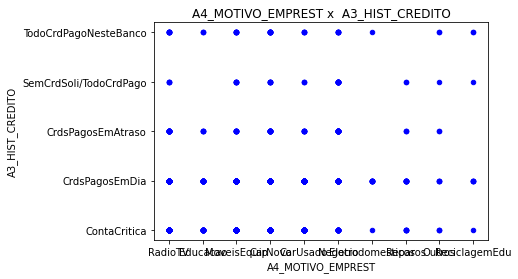

In [40]:
df1.plot(x='A4_MOTIVO_EMPREST',y='A3_HIST_CREDITO',kind='scatter', title='A4_MOTIVO_EMPREST x  A3_HIST_CREDITO',color='b')

In [41]:
df1.groupby('A3_HIST_CREDITO')['A5_VALOR_EMPREST'].mean()

A3_HIST_CREDITO
ContaCritica              3088.037543
CrdsPagosEmAtraso         4302.602273
CrdsPagosEmDia            3040.958491
SemCrdSoli/TodoCrdPago    5305.675000
TodoCrdPagoNesteBanco     3344.877551
Name: A5_VALOR_EMPREST, dtype: float64

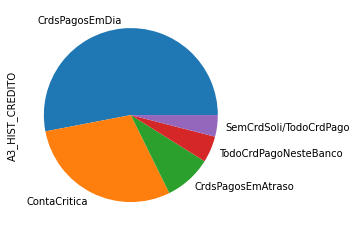

In [42]:
df1.A3_HIST_CREDITO.value_counts().plot(kind='pie')
plt.show()

In [43]:
df1.groupby('A20_EMPREGADO_EST')['A5_VALOR_EMPREST'].mean()

A20_EMPREGADO_EST
Nao    2550.864865
Sim    3298.936656
Name: A5_VALOR_EMPREST, dtype: float64

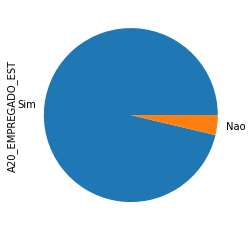

In [45]:
df1.A20_EMPREGADO_EST.value_counts().plot(kind='pie')
plt.show()

In [46]:
pd.crosstab(df1.categ_turma,df1.sit_aluno).plot(kind='bar',figsize=(6, 4))
plt.title('Tamanho da turma vs Situação do Aluno')
dataset.groupby(['categ_turma','sit_aluno']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True,figsize=(6, 4))

AttributeError: ignored

#Conclusão

O perfil dos clientes é ...